## Unsuprevised learning

We gaan kijken wat er mogelijk is met unsuprevised learning, door de data van de fiets snelwegen met elkaar te vergelijken.

In [20]:
# Library imports
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
# Functions for correlation and performance measurement

# Check correlation within the data
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45) 
    plt.show()

# Measure performance 
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")

    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")

For the unsuprevised we choose to use K-Means, K nearest neightbore. 

In [3]:
# Import the dataframe
pd_all = gpd.read_file('data/netwerk-2016.json')

pd_all.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1121087 entries, 0 to 1121086
Data columns (total 9 columns):
LINKNUMMER    1121087 non-null int64
SOURCE        1121087 non-null int64
TARGET        1121087 non-null int64
HIGHWAY       1121087 non-null object
SPEED         1121087 non-null float64
INTENSITEI    1121087 non-null int64
INTENSI_01    1121087 non-null int64
SNELHEID_R    1121087 non-null float64
geometry      1121083 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 77.0+ MB


In [4]:
# Map the highway to numbers
pd_all['HIGHWAY_LABEL'] = pd_all['HIGHWAY'].map({'cycleway' : 0, 'secondary': 1, 'residential': 2, 'tertiary': 3
                                                   , 'footway': 4, 'pedestrian': 5, 'unclassified': 6, 'service': 7
                                                   , 'secondary_link': 8, 'path': 9,'steps': 10, 'track': 11 })


dictionary = {'cycleway' : 0, 'secondary': 1, 'residential': 1, 'tertiary': 3
                                                   , 'footway': 4, 'pedestrian': 5, 'unclassified': 6, 'service': 7
                                                   , 'secondary_link': 8, 'path': 9,'steps': 10, 'track': 11 }

# Convert all numbers to numbers
pd_all['LINKNUMMER'] = pd_all['LINKNUMMER'].astype(float)
pd_all['SNELHEID_R'] = pd_all['SNELHEID_R'].astype(float)
pd_all['SPEED'] = pd_all['SPEED'].astype(float)
pd_all['INTENSITEI'] = pd_all['INTENSITEI'].astype(float)
pd_all['INTENSI_01'] = pd_all['INTENSI_01'].astype(float)

# Drop all NaN values in the dataset
pd_all = pd_all.dropna()

In [7]:
from sklearn.cluster import KMeans

# Fill dataset
dataset = pd_all[['INTENSITEI', 'HIGHWAY_LABEL', 'SPEED', 'LINKNUMMER']]

# Convert DataFrame to matrix
mat = dataset.as_matrix()

# Using sklearn
km = KMeans(n_clusters=4)
km.fit(mat)

# Get cluster assignment labels
labels = km.labels_

# Format results as a DataFrame
results = pd.DataFrame([dataset.index,labels]).T

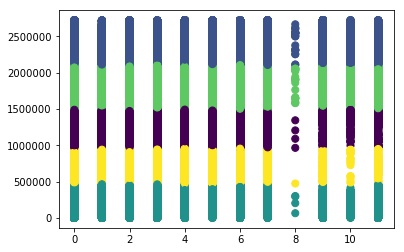

In [21]:
import matplotlib.pyplot as plt
import numpy as np

y_kmeans = km.predict(mat)

plt.scatter(mat[:, 1], mat[:, 3], c=y_kmeans, s=50, cmap='viridis')
plt.show()

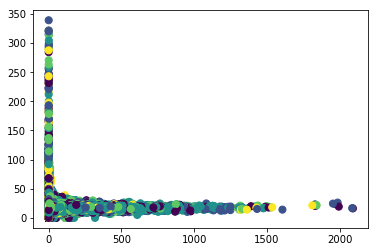

In [26]:
import matplotlib.pyplot as plt
import numpy as np

y_kmeans = km.predict(mat)

plt.scatter(mat[:, 0], mat[:, 2], c=y_kmeans, s=50, cmap='viridis')
plt.show()

These plots didn't really show us anything because the data doesn't fit any scatter plot.

/Users/robvangastel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


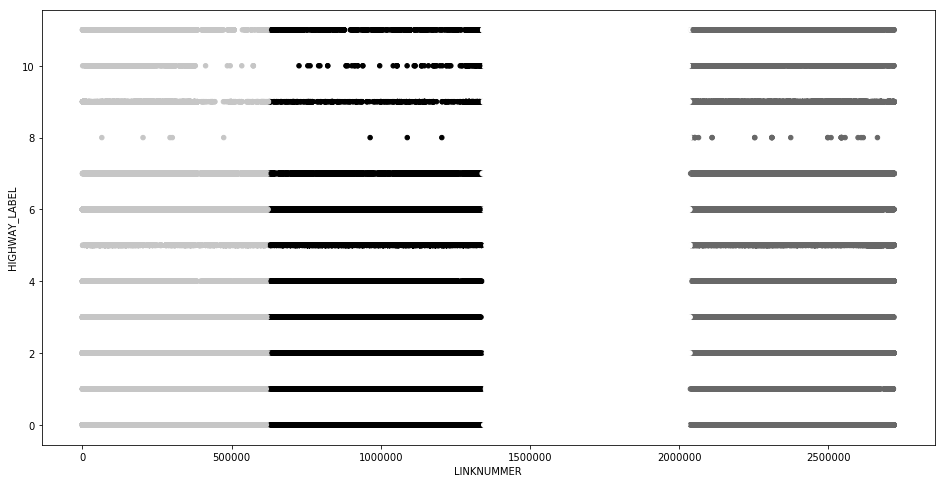

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline  

dataset['cluster'] = pd.Series(km.labels_, index=dataset.index)

dataset.plot(
        kind='scatter',
        x='LINKNUMMER',y='HIGHWAY_LABEL',
        c=dataset.cluster.astype(np.float), 
        figsize=(16,8))

/Users/robvangastel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


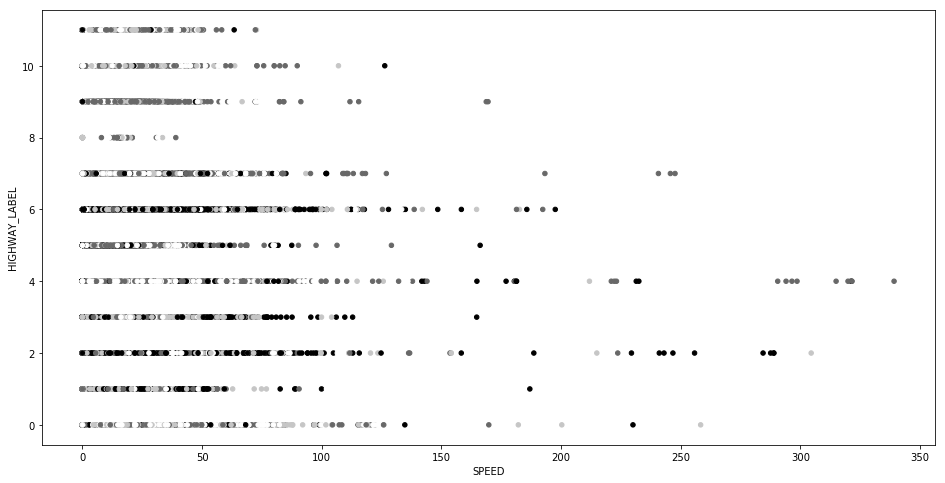

In [30]:
dataset['cluster'] = pd.Series(km.labels_, index=dataset.index)

dataset.plot(
        kind='scatter',
        x='SPEED',y='HIGHWAY_LABEL',
        c=dataset.cluster.astype(np.float), 
        figsize=(16,8))

/Users/robvangastel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


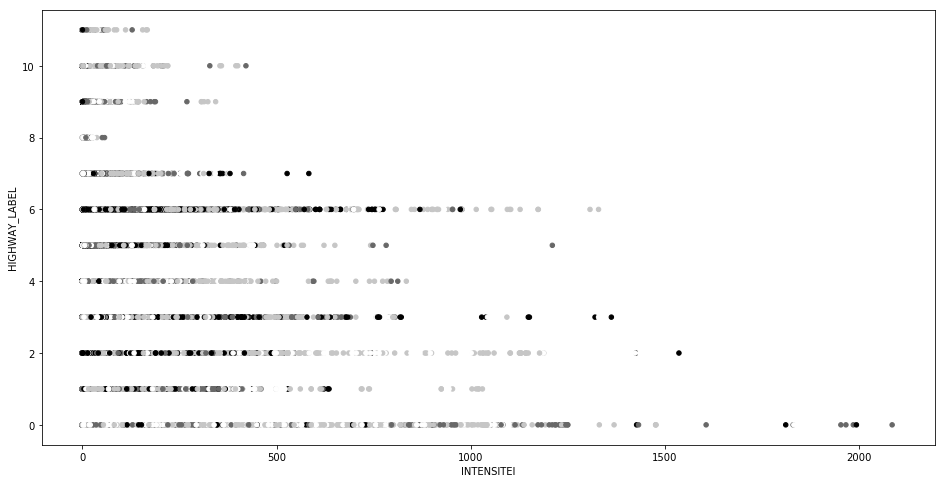

In [31]:
dataset['cluster'] = pd.Series(km.labels_, index=dataset.index)

dataset.plot(
        kind='scatter',
        x='INTENSITEI',y='HIGHWAY_LABEL',
        c=dataset.cluster.astype(np.float), 
        figsize=(16,8))